
# Computer Vision Assigment 01
## Name: Syed Muhammad Ammar Ali Jaffri
## ID: sa07695

<h1>Question 1</h1>
Load the CIFAR-10 Dataset and briefly describe what the dataset is about and the constituents of it. You can
view the documentation for CIFAR-10 dataset here. Also mention some of the preprocessing steps which can be
applied while dealing with image data in general.

In [ ]:
from keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import os
from PIL import Image
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from statistics import mean


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict



Loading the CIFAR-10 Dataset.

In [ ]:
# Loading the data

(X_train, y_train), (X_test,y_test) = cifar10.load_data()

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Determing the characteristics of the data

print('Training Images: {}'.format(X_train.shape))
print('The tuple in output shows the characteristics. For the training images, there are 50000 images of 32x32x3 dimension.')
print('\n')
print('Testing Images: {}'.format(X_test.shape))
print('The tuple in output shows the characteristics. For the testing images, there are 10000 images of 32x32x3 dimension.')




Training Images: (60000, 28, 28)
The tuple in output shows the characteristics. For the training images, there are 50000 images of 32x32x3 dimension.


Testing Images: (10000, 28, 28)
The tuple in output shows the characteristics. For the testing images, there are 10000 images of 32x32x3 dimension.


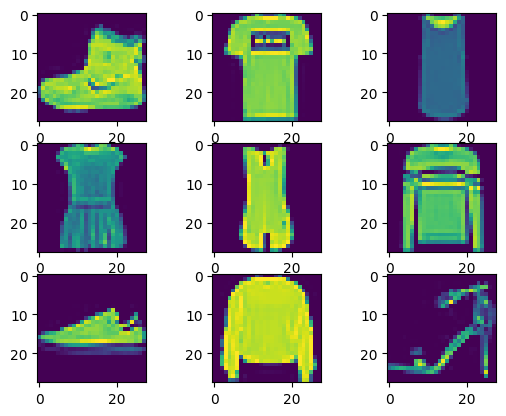

In [ ]:
# Trying to visualize images to determine the dataset

for i in range(0,9):
  plt.subplot(330+1+i)
  img = X_train[i]
  plt.imshow(img)

plt.show()

<h1>Description and Constituents of the Dataset</h1>


The CIFAR-10 dataset used consists of 60000 colour, RGB, images of dimension 32x32x3 which includes 10 different classes, hence each class have 6000 images in the dataset. Moreover the dataset is been splitted in a way that the training batch contains 50000 images and the test batch contains 10000 images.

Moreover, the dataset is divided into 5 training batches and one test batches. All these 6 batches contain 10000 images each. Furthermore, the test batch only consists of 1000 randomly selected images from each class. While, on the other hand, training batches contain the remaining images in random order. For example: Some training batches must have more images of one class from another but among all the batches there are 5000 images of each class.

The classes in the dataset consists of airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck and all these classes are mutually exclusive to each other. For example: There is no overlap in between the classes as automobile includes only sedans, suvs etc while truck only includes trucks.

<h1>Preprocessing Steps for Image Data</h1>

There are multiple pre-processing steps that can be applied to the image datasets before the training of the model. These several pre-processing steps are applied to the image data to enhance the perfomance and generalization of the model.


<h2>Normalization</h2>
Normalization is one of the most important pre-processing steps for image data. This process is to scale down the values of pixels in a consistent range of between 0 and 1. It ensures that's model's learning is not influenced by the varying magnitude of the pixels which is crucial for optimization algorithms.

<h2>Noise Removal</h2>
Noise in an image can be caused by various factors such as low light.  Noise reduction techniques aim to remove noise from the image by removing irrelvant noise and artifacts from images that may affect negatively to the model perfomance while preserving its essential features. Some example of these techniques are median filtering, gaussian smoothing etc.

<h2>Image Resizing</h2>
This is a pre-processing technique that is used to adjust the size of an image. These techniques can be employed to make a smaller image large or vice versa or to change its aspect ratio. This also standardize image dimensions to a consistent size for uniform input to the model.

There are some more pre-processing steps that are employed such as Colour correction, segmentation etc.

<h1>Question 2</h1>

Write a function "filt" whose aim would be to perform the task of filtering. The function should take the
following arguments: input, filter, padding, normalization. The 'input' would be the numpy representation of an
image over which filtering is to be performed - this will either have a single channel or three channels, 'filter' would
be a 2D numpy array representing the filter (for example: np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]), 'padding' would
be a boolean value which would determine as to whether the output image should have the same size as the input
image, and 'normalization' would again be a boolean value which would determine as to whether the filtering
operation needs to be normalized or not. The output of this function should be the filtered image. Also note that
the only external library which can be used in this function is "numpy".

In [ ]:

def filt(input, filter, padding, normalization):

    input = np.array(input) # Double checking and Ensuring the input image and filter are numpy arrays
    filter = np.array(filter)


    filt_h, filt_w = filter.shape   # Finding the dimensions of filter.


    is_rgb = len(input.shape) == 3 and input.shape[2] == 3  # Check if the input image is grayscale or RGB by checking that whether the image is 3 dimensional and the 3rd dimension has a size of 3.


    if padding == True:            # Apply padding if required as passed by the input

        pad_height = filt_h // 2   # Calculating the amount of padding needed on the top/bottom sides.
        pad_width = filt_w // 2     # Calculating the amount of padding needed on the left/right sides.


        if len(input.shape) == 2:  # Grayscale image
            input = np.pad(input, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
        elif len(input.shape) == 3 and input.shape[2] == 3:  # RGB image
            input = np.pad(input, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant', constant_values=0)

    filtered_image = np.zeros_like(input)  # Initializing an numpy which dimension is replica of the image but all the entries are zero.



    for i in range(input.shape[0] - filt_h + 1):   # Loop through the image pixels to apply the filter to apply the process of convulution.
        for j in range(input.shape[1] - filt_w + 1):

            region = input[i:i + filt_h, j:j + filt_w]   # Extracting the region of the image overlapping to the filter

            result = region * filter    # Element-wise multiplication of the overlapped region of the image with the filter

            # Normalize if required as passed by the input

            if normalization:
              result_sum = np.sum(result)
              if result_sum != 0:  # Avoid division by zero
                result = result / result_sum  # Normalize the convolution result

           # Clip values to ensure they stay within the desired range
              result = np.clip(result, -1, 1)

            # Sum the filtered values and place the result in the center of the output image
            filtered_image[i,j] = np.sum(result)



    return filtered_image



<font color='red'> Testing the filter function, the image is uploaded along with ipynb file and must be uploaded to the notebook to test the function.</font>


(183, 275, 3)


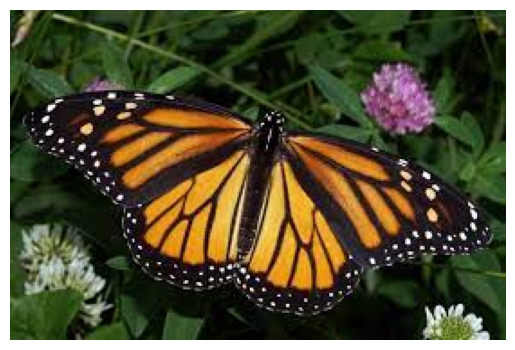

(185, 277, 3)


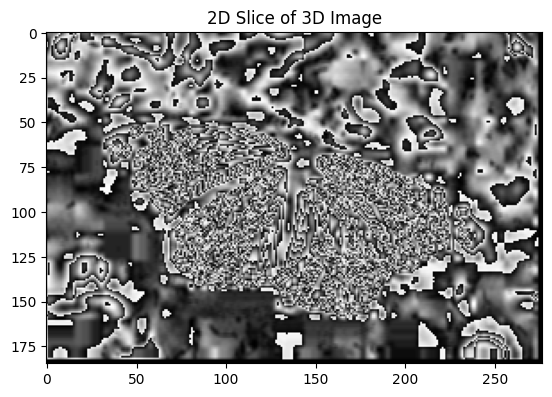

In [ ]:
# Testing the filter function, the image is uploaded along with ipynb file.
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# Load the image from Google Drive (replace with your image path)
image_path = "/content/download.jpg"
image = Image.open(image_path)

# Convert the image to a NumPy array
rgb_array = np.array(image)

# If the image is in RGBA mode, convert it to RGB
if rgb_array.shape[-1] == 4:
    rgb_array = rgb_array[:, :, :3]

# Print the shape of the resulting array
print(rgb_array.shape)

# Display the image using Matplotlib
plt.imshow(rgb_array)
plt.axis('off')  # Turn off axis labels
plt.show()



filter = np.array([[-1, -1 , -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

sobel_x = np.array([[ 1, 0, -1],
                    [ 2, 0, -2],
                    [ 1, 0, -1]])
sobel_y = np.array([[ -1, -2, -1],
                    [ 0, 0, 0],
                    [ 1, 2, 1]])

filtered_image_1 = filt(rgb_array, sobel_x , padding=True, normalization=False)



# Visualize the 2D image using matplotlib
print(filtered_image_1.shape)
plt.imshow(filtered_image_1, cmap='gray')  # Assuming a grayscale image, change the cmap as needed
plt.title('2D Slice of 3D Image')
plt.show()

<h1>Question 3</h1>

Extract HOG features from the CIFAR-10 dataset, and train a Linear SVM using those features. You are
expected to reach around 45% accuracy on test data using this method.

In [ ]:
from skimage.feature import hog

In [ ]:
# Pre-processing the data by converting the RGB image to grayscale.
# Then the preprocess function calls the hog function to extract features.
def preprocess(xs):
    x_hog = []
    for gray in tqdm(xs):
        # gray = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY) / 255   # Converting to the grayscale.
        fd = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                    	cells_per_block=(2, 2))
        x_hog.append(fd)
    return np.array(x_hog)

In [ ]:
# Converting the X_train and the X_test into grayscale and extracting features using hog.
print("The image is converted into a 2D representation of grayscale from RGB.")
X_train_hog = preprocess(X_train)
print("The shape for the dataset of X_training.")
print(X_train.shape)

X_test_hog = preprocess(X_test)
print('\n')
print("The shape for the dataset of X_testing.")
print(X_test.shape)

y_train.ravel()

The image is converted into a 2D representation of grayscale from RGB.


100%|██████████| 60000/60000 [00:15<00:00, 3785.74it/s]


The shape for the dataset of X_training.
(60000, 28, 28)


100%|██████████| 10000/10000 [00:02<00:00, 3978.95it/s]



The shape for the dataset of X_testing.
(10000, 28, 28)


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
svm_model = LinearSVC()   # Initializing the Linear SVM Model

# Training the model on the training set X_train given after feature extraction
svm_model.fit(X_train_hog, y_train)

# Making predictions on the test set X_test
y_pred = svm_model.predict(X_test_hog)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy after training the dataset CIFAR-10 using Linear SVM and hog for feature extraction is below:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print('done!')



The accuracy after training the dataset CIFAR-10 using Linear SVM and hog for feature extraction is below:
Accuracy: 80.88%
done!


<h1> Question 4 - For MNIST</h1>
 This part requires you to use only pytorch. In each of the following subparts (a, b, and c) you are required to
do the following:

i. Create a network architecture.

ii. Load the MNIST dataset.

iii. Preprocess the dataset accordingly.

iv. Train your architecture on the dataset for a reasonable number of epochs (maximum is 100) using the testing
data as your validation data.

v. Report both your training accuracy as well as validation accuracy.

vi. Plot both the training loss as well as the validation loss on the same plot.

vii. Plot both the training accuracy as well as the validation accuracy on the same plot.

For each subpart you are encouraged to experiment both with the hyperparameters as well as different
architecture designs for your network.

<h2>

In [ ]:
import torch, torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import torchvision.models as models
import copy

In [ ]:
numb_batch = 64

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the Fashion MNIST training and test datasets
trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [ ]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, output_size=10):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer
        self.relu = nn.ReLU()                          # Activation function
        self.fc2 = nn.Linear(hidden_size, output_size)  # Output layer

    def forward(self, x):
        x = self.fc1(x)               # Pass through the first layer
        x = self.relu(x)              # Apply ReLU activation
        x = self.fc2(x)               # Pass through the output layer
        return x

In [ ]:
# Function to train the model
def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20):
    train_losses = []
    valid_losses = []
    train_acc = []
    valid_acc = []
    size_train = len(train_loader)
    size_val = len(valid_loader)

    for epoch in range(num_epochs):
        model.train()
        loss_cont = 0.0
        c_pred_train = 0
        tot_train = 0

        for inputs, labels in train_loader:
            inputs = inputs.view(-1, 28*28)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            loss_cont += loss.item()

            predicted_value, predicted_index = outputs.max(1)
            tot_train += labels.size(0)
            c_pred_train += predicted_index.eq(labels).sum().item()

        mean_loss_cont = loss_cont / size_train
        train_losses.append(mean_loss_cont)
        train_accuracy = (c_pred_train / tot_train) * 100
        train_acc.append(train_accuracy)

        # Validation
        model.eval()
        valid_loss = 0.0
        c_pred_valid = 0
        tot_valid = 0

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs = inputs.view(-1, 28*28)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()

                predicted_value, predicted_index = outputs.max(1)
                tot_valid += labels.size(0)
                c_pred_valid += predicted_index.eq(labels).sum().item()

        mean_valid_loss = valid_loss / size_val
        valid_losses.append(mean_valid_loss)
        valid_accuracy = (c_pred_valid / tot_valid) * 100
        valid_acc.append(valid_accuracy)

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Train Loss: {mean_loss_cont:.4f}, Train Acc: {train_accuracy:.4f}, '
              f'Valid Loss: {mean_valid_loss:.4f}, Valid Acc: {valid_accuracy:.4f}')

    return train_losses, valid_losses, train_acc, valid_acc


In [ ]:
# Function to plot the loss and accuracy curves
def plot_curves(train_losses, valid_losses, train_acc, valid_acc):
    plt.figure(figsize=(12, 4))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(valid_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


Epoch [1/20], Train Loss: 0.5015, Train Acc: 82.0867, Valid Loss: 0.4403, Valid Acc: 84.4000
Epoch [2/20], Train Loss: 0.3840, Train Acc: 86.0333, Valid Loss: 0.3917, Valid Acc: 85.7300
Epoch [3/20], Train Loss: 0.3429, Train Acc: 87.4083, Valid Loss: 0.3989, Valid Acc: 85.4700
Epoch [4/20], Train Loss: 0.3210, Train Acc: 88.2100, Valid Loss: 0.3775, Valid Acc: 85.9800
Epoch [5/20], Train Loss: 0.3037, Train Acc: 88.8033, Valid Loss: 0.3569, Valid Acc: 86.9400
Epoch [6/20], Train Loss: 0.2856, Train Acc: 89.5133, Valid Loss: 0.3637, Valid Acc: 87.0600
Epoch [7/20], Train Loss: 0.2751, Train Acc: 89.9167, Valid Loss: 0.3484, Valid Acc: 87.7700
Epoch [8/20], Train Loss: 0.2646, Train Acc: 90.2600, Valid Loss: 0.3526, Valid Acc: 87.3900
Epoch [9/20], Train Loss: 0.2550, Train Acc: 90.6083, Valid Loss: 0.3499, Valid Acc: 87.2300
Epoch [10/20], Train Loss: 0.2438, Train Acc: 90.8967, Valid Loss: 0.3558, Valid Acc: 87.3300
Epoch [11/20], Train Loss: 0.2353, Train Acc: 91.3500, Valid Loss: 0.

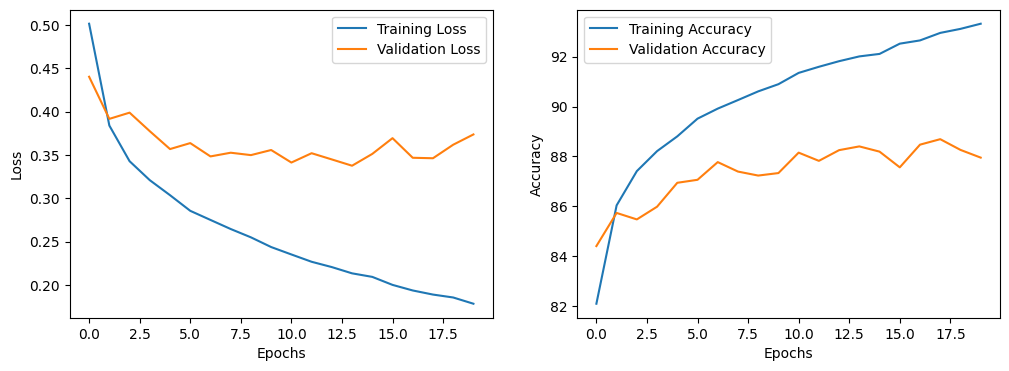



Final Training Accuracy:  93.32333333333334  %
Final Test Accuracy:  87.94999999999999  %


In [ ]:

# Create model, loss function, and optimizer

input_size = 784  # Images are of 28x28 so the input size equals to 28 x 28 = 784
hidden_size1 = 128
output_size = 10  # The number of classes are 10 since 0 to 9.

model = FeedForwardNN(input_size, hidden_size1, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_losses, valid_losses, train_acc, valid_acc = train_model(model, trainloader, testloader, criterion, optimizer, num_epochs=20)

# Plot the loss and accuracy curves
plot_curves(train_losses, valid_losses, train_acc, valid_acc)
print('\n')
print("Final Training Accuracy: ", train_acc[-1]," %")
print("Final Test Accuracy: ", valid_acc[-1]," %")


In [ ]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_size=784, hidden_size1=128,hidden_size2 =64,hidden_size3 =32, output_size=10,dropout_rate = 0.5):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)  # First fully connected layer
        self.relu = nn.ReLU()                          # Activation function
        self.dropout1 = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  # Output layer
        self.relu = nn.ReLU()
        self.dropout2 = nn.Dropout(p=dropout_rate)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)  # Output layer
        self.relu = nn.ReLU()
        self.dropout3 = nn.Dropout(p=dropout_rate)
        self.fc4 = nn.Linear(hidden_size3, output_size)

    def forward(self, x):
        x = self.fc1(x)               # Pass through the first layer
        x = self.relu(x)              # Apply ReLU activation
        x = self.fc2(x)               # Pass through the output layer
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

Epoch [1/20], Train Loss: 0.5428, Train Acc: 80.2667, Valid Loss: 0.4564, Valid Acc: 83.0300
Epoch [2/20], Train Loss: 0.3892, Train Acc: 85.8067, Valid Loss: 0.3866, Valid Acc: 85.8200
Epoch [3/20], Train Loss: 0.3493, Train Acc: 87.1117, Valid Loss: 0.3799, Valid Acc: 86.2600
Epoch [4/20], Train Loss: 0.3226, Train Acc: 88.1083, Valid Loss: 0.3657, Valid Acc: 86.7400
Epoch [5/20], Train Loss: 0.3074, Train Acc: 88.6583, Valid Loss: 0.3580, Valid Acc: 87.2700
Epoch [6/20], Train Loss: 0.2869, Train Acc: 89.2650, Valid Loss: 0.3710, Valid Acc: 86.8300
Epoch [7/20], Train Loss: 0.2783, Train Acc: 89.6833, Valid Loss: 0.3393, Valid Acc: 87.8700
Epoch [8/20], Train Loss: 0.2648, Train Acc: 90.0617, Valid Loss: 0.3537, Valid Acc: 87.4000
Epoch [9/20], Train Loss: 0.2540, Train Acc: 90.4533, Valid Loss: 0.3407, Valid Acc: 87.9700
Epoch [10/20], Train Loss: 0.2444, Train Acc: 90.9117, Valid Loss: 0.3366, Valid Acc: 87.9400
Epoch [11/20], Train Loss: 0.2363, Train Acc: 91.2633, Valid Loss: 0.

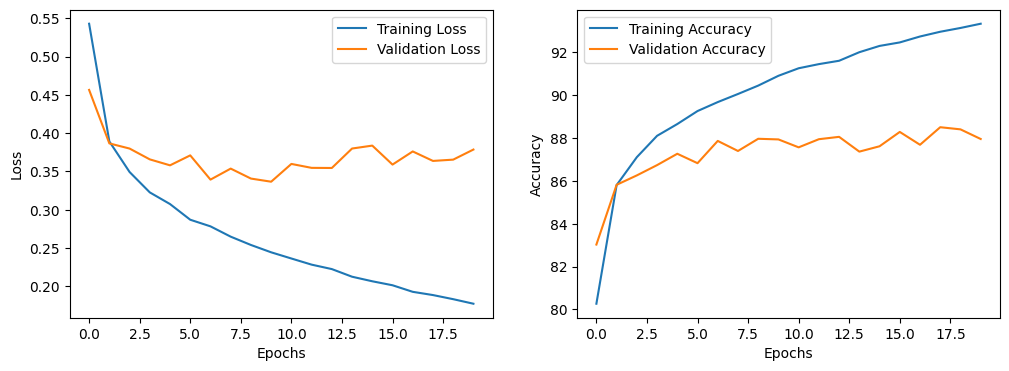



Final Training Accuracy:  93.34333333333333  %
Final Test Accuracy:  87.96000000000001  %


In [ ]:

# Create model, loss function, and optimizer

input_size = 784  # Images are of 28x28 so the input size equals to 28 x 28 = 784
hidden_size1 = 128
hidden_size2 = 64
hidden_size3 = 32
output_size = 10  # The number of classes are 10 since 0 to 9.

model = FeedForwardNN(input_size, hidden_size1, hidden_size2,hidden_size3, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_losses, valid_losses, train_acc, valid_acc = train_model(model, trainloader, testloader, criterion, optimizer, num_epochs=20)

# Plot the loss and accuracy curves
plot_curves(train_losses, valid_losses, train_acc, valid_acc)
print('\n')
print("Final Training Accuracy: ", train_acc[-1]," %")
print("Final Test Accuracy: ", valid_acc[-1]," %")


In [ ]:
# Define the Convolutional Neural Network (CNN) architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# Function to train the model
def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20):
    train_losses = []
    valid_losses = []
    train_acc = []
    valid_acc = []
    size_train = len(train_loader)
    size_val = len(valid_loader)

    for epoch in range(num_epochs):
        model.train()
        loss_cont = 0.0
        c_pred_train = 0
        tot_train = 0

        for inputs, labels in train_loader:
            inputs = inputs.view(-1, 1, 28, 28)  # Reshape for CNN
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            loss_cont += loss.item()

            predicted_value, predicted_index = outputs.max(1)
            tot_train += labels.size(0)
            c_pred_train += predicted_index.eq(labels).sum().item()

        mean_loss_cont = loss_cont / size_train
        train_losses.append(mean_loss_cont)
        train_accuracy = (c_pred_train / tot_train) * 100
        train_acc.append(train_accuracy)

        # Validation
        model.eval()
        valid_loss = 0.0
        c_pred_valid = 0
        tot_valid = 0

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs = inputs.view(-1, 1, 28, 28)  # Reshape for CNN
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()

                predicted_value, predicted_index = outputs.max(1)
                tot_valid += labels.size(0)
                c_pred_valid += predicted_index.eq(labels).sum().item()

        mean_valid_loss = valid_loss / size_val
        valid_losses.append(mean_valid_loss)
        valid_accuracy = (c_pred_valid / tot_valid) * 100
        valid_acc.append(valid_accuracy)

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Train Loss: {mean_loss_cont:.4f}, Train Acc: {train_accuracy:.4f}, '
              f'Valid Loss: {mean_valid_loss:.4f}, Valid Acc: {valid_accuracy:.4f}')

    return train_losses, valid_losses, train_acc, valid_acc


Epoch [1/20], Train Loss: 0.4209, Train Acc: 84.9767, Valid Loss: 0.3108, Valid Acc: 88.7000
Epoch [2/20], Train Loss: 0.2694, Train Acc: 90.2617, Valid Loss: 0.2627, Valid Acc: 90.5200
Epoch [3/20], Train Loss: 0.2231, Train Acc: 91.8083, Valid Loss: 0.2428, Valid Acc: 91.0600
Epoch [4/20], Train Loss: 0.1906, Train Acc: 92.9633, Valid Loss: 0.2360, Valid Acc: 91.3500
Epoch [5/20], Train Loss: 0.1628, Train Acc: 94.0217, Valid Loss: 0.2359, Valid Acc: 91.8600
Epoch [6/20], Train Loss: 0.1383, Train Acc: 94.9767, Valid Loss: 0.2297, Valid Acc: 91.7400
Epoch [7/20], Train Loss: 0.1204, Train Acc: 95.4650, Valid Loss: 0.2534, Valid Acc: 91.7100
Epoch [8/20], Train Loss: 0.0999, Train Acc: 96.2850, Valid Loss: 0.2665, Valid Acc: 91.4400
Epoch [9/20], Train Loss: 0.0830, Train Acc: 96.9700, Valid Loss: 0.2739, Valid Acc: 91.9600
Epoch [10/20], Train Loss: 0.0662, Train Acc: 97.5867, Valid Loss: 0.2853, Valid Acc: 92.1800
Epoch [11/20], Train Loss: 0.0578, Train Acc: 97.9483, Valid Loss: 0.

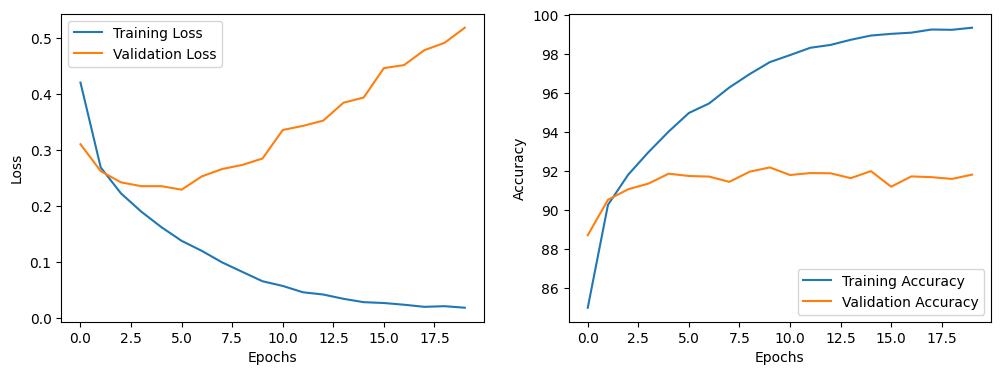



Final Training Accuracy:  99.35333333333334 %
Final Test Accuracy:  91.81 %


In [ ]:
# Create model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_losses, valid_losses, train_acc, valid_acc = train_model(model, trainloader, testloader, criterion, optimizer, num_epochs=20)

# Plot the loss and accuracy curves
plot_curves(train_losses, valid_losses, train_acc, valid_acc)

print('\n')
print("Final Training Accuracy: ", train_acc[-1],"%")
print("Final Test Accuracy: ", valid_acc[-1],"%")


In [ ]:
import torch, torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import torchvision.models as models
import copy

In [ ]:

# Define transformations for the training and test data
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resizing to make both MNIST and ImageNet on same scale
    transforms.Grayscale(num_output_channels=3),  # Convert 1-channel grayscale to RGB 3-channel, all having same values.
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize using VGG-16's normalization values
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])



In [ ]:
# Define a transform to normalize the data
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229])  # Normalize using single-channel stats
])


# Load the Fashion MNIST training and test datasets
trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [ ]:
# Function to train the model
def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20):
    train_losses = []
    valid_losses = []
    train_acc = []
    valid_acc = []
    size_train = len(train_loader)
    size_val = len(valid_loader)

    for epoch in range(num_epochs):
        model.train()
        loss_cont = 0.0
        c_pred_train = 0
        tot_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            loss_cont += loss.item()

            predicted_value, predicted_index = outputs.max(1)
            tot_train += labels.size(0)
            c_pred_train += predicted_index.eq(labels).sum().item()

        mean_loss_cont = loss_cont / size_train
        train_losses.append(mean_loss_cont)
        train_accuracy = (c_pred_train / tot_train) * 100
        train_acc.append(train_accuracy)

        # Validation
        model.eval()
        valid_loss = 0.0
        c_pred_valid = 0
        tot_valid = 0

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()

                predicted_value, predicted_index = outputs.max(1)
                tot_valid += labels.size(0)
                c_pred_valid += predicted_index.eq(labels).sum().item()

        mean_valid_loss = valid_loss / size_val
        valid_losses.append(mean_valid_loss)
        valid_accuracy = (c_pred_valid / tot_valid) * 100
        valid_acc.append(valid_accuracy)

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Train Loss: {mean_loss_cont:.4f}, Train Acc: {train_accuracy:.4f}, '
              f'Valid Loss: {mean_valid_loss:.4f}, Valid Acc: {valid_accuracy:.4f}')

    return train_losses, valid_losses, train_acc, valid_acc


In [ ]:
# Function to plot the loss and accuracy curves
def plot_curves(train_losses, valid_losses, train_acc, valid_acc):
    plt.figure(figsize=(12, 4))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(valid_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


Epoch [1/5], Train Loss: 0.6728, Train Acc: 75.7833, Valid Loss: 0.4639, Valid Acc: 83.0300
Epoch [2/5], Train Loss: 0.5165, Train Acc: 81.1950, Valid Loss: 0.4157, Valid Acc: 85.0100
Epoch [3/5], Train Loss: 0.4927, Train Acc: 82.2483, Valid Loss: 0.3947, Valid Acc: 85.4900
Epoch [4/5], Train Loss: 0.4754, Train Acc: 82.7467, Valid Loss: 0.3830, Valid Acc: 85.7600
Epoch [5/5], Train Loss: 0.4647, Train Acc: 83.0967, Valid Loss: 0.3707, Valid Acc: 86.2700


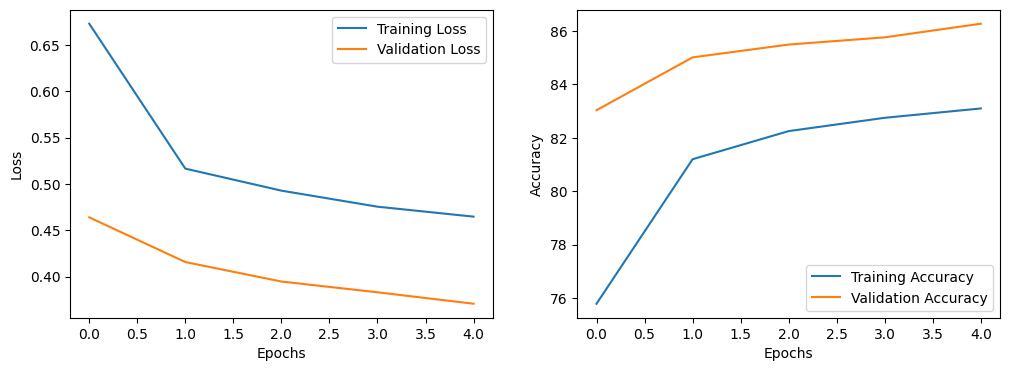

The Final Training Accuracy is:  83.09666666666666  %
The Final Testing Accuracy is:  86.27  %


In [ ]:

# Load pre-trained VGG-16 model
model = torchvision.models.vgg16(pretrained=True)

# Freeze the parameters of the pre-trained layers
for param in model.parameters():
    param.requires_grad = False

# Replacing the last fully connected layer (classifier) with a Classifier based on CIFAR10 classes.
in_features = model.classifier[6].in_features
model.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
model.classifier[6] = nn.Linear(in_features, 10)  # 10 output classes for CIFAR-10

# Change model to available device
model.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)


train_losses, test_losses, train_acc, test_acc = train_model(model, trainloader, testloader, criterion, optimizer, 5)
plot_curves(train_losses, test_losses, train_acc, test_acc)

print("The Final Training Accuracy is: ",train_acc[-1], " %")
print("The Final Testing Accuracy is: ",test_acc[-1], " %")

<h2> Part (a) </h2>

 Create a feed forward neural network consisting of only fully connected layers; the network should have at least
two hidden layers. You are allowed to experiment with regularization techniques and are expected to reach above
55% accuracy on test data.

In [ ]:
numb_batch = 64

In [ ]:
# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
valid_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
train_dl = DataLoader(dataset=train_data, batch_size=numb_batch, shuffle=True)
valid_dl = DataLoader(dataset=valid_data, batch_size=numb_batch, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 340221201.32it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 79747000.54it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 185333138.51it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 16310384.22it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



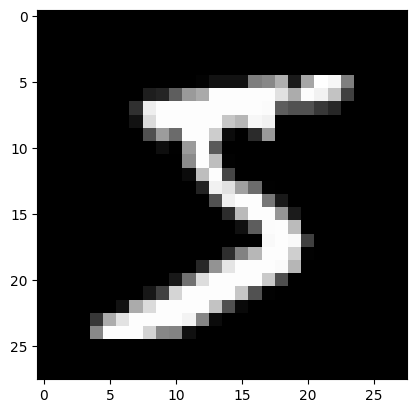

In [ ]:
plt.imshow(train_data[0][0][0],cmap = "gray")

In [ ]:
print("The size of MNIST Training Set: ")
print(len(train_dl))
print("The size of MNIST Testing Set: ")
print(len(valid_dl))

The size of MNIST Training Set: 
938
The size of MNIST Testing Set: 
157


In [ ]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_rate=0.5):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_rate)

        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=dropout_rate)

        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = (self.relu1(self.fc1(x)))
        x = (self.relu2(self.fc2(x)))
        x = self.fc3(x)
        return x



In [ ]:
# Function to train the model
def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20):
    train_losses = []
    valid_losses = []
    train_acc = []
    valid_acc = []
    size_train = len(train_loader)
    size_val = len(valid_loader)

    for epoch in range(num_epochs):
        model.train()
        loss_cont = 0.0
        c_pred_train = 0
        tot_train = 0

        for inputs, labels in train_loader:
            inputs = inputs.view(-1, 28*28)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            loss_cont += loss.item()

            predicted_value, predicted_index = outputs.max(1)
            tot_train += labels.size(0)
            c_pred_train += predicted_index.eq(labels).sum().item()

        mean_loss_cont = loss_cont / size_train
        train_losses.append(mean_loss_cont)
        train_accuracy = (c_pred_train / tot_train) * 100
        train_acc.append(train_accuracy)

        # Validation
        model.eval()
        valid_loss = 0.0
        c_pred_valid = 0
        tot_valid = 0

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs = inputs.view(-1, 28*28)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()

                predicted_value, predicted_index = outputs.max(1)
                tot_valid += labels.size(0)
                c_pred_valid += predicted_index.eq(labels).sum().item()

        mean_valid_loss = valid_loss / size_val
        valid_losses.append(mean_valid_loss)
        valid_accuracy = (c_pred_valid / tot_valid) * 100
        valid_acc.append(valid_accuracy)

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Train Loss: {mean_loss_cont:.4f}, Train Acc: {train_accuracy:.4f}, '
              f'Valid Loss: {mean_valid_loss:.4f}, Valid Acc: {valid_accuracy:.4f}')

    return train_losses, valid_losses, train_acc, valid_acc


In [ ]:
# Function to plot the loss and accuracy curves
def plot_curves(train_losses, valid_losses, train_acc, valid_acc):
    plt.figure(figsize=(12, 4))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(valid_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


Epoch [1/20], Train Loss: 0.4003, Train Acc: 88.2433, Valid Loss: 0.2219, Valid Acc: 93.4600
Epoch [2/20], Train Loss: 0.1942, Train Acc: 94.1100, Valid Loss: 0.1449, Valid Acc: 95.4200
Epoch [3/20], Train Loss: 0.1413, Train Acc: 95.7217, Valid Loss: 0.1286, Valid Acc: 96.2000
Epoch [4/20], Train Loss: 0.1126, Train Acc: 96.5950, Valid Loss: 0.1072, Valid Acc: 96.7300
Epoch [5/20], Train Loss: 0.0945, Train Acc: 97.0950, Valid Loss: 0.1090, Valid Acc: 96.4300
Epoch [6/20], Train Loss: 0.0825, Train Acc: 97.4433, Valid Loss: 0.0995, Valid Acc: 97.0100
Epoch [7/20], Train Loss: 0.0745, Train Acc: 97.6800, Valid Loss: 0.1319, Valid Acc: 95.8500
Epoch [8/20], Train Loss: 0.0686, Train Acc: 97.8817, Valid Loss: 0.1063, Valid Acc: 96.7900
Epoch [9/20], Train Loss: 0.0631, Train Acc: 97.8850, Valid Loss: 0.0915, Valid Acc: 97.2400
Epoch [10/20], Train Loss: 0.0543, Train Acc: 98.2683, Valid Loss: 0.0953, Valid Acc: 97.1000
Epoch [11/20], Train Loss: 0.0532, Train Acc: 98.2367, Valid Loss: 0.

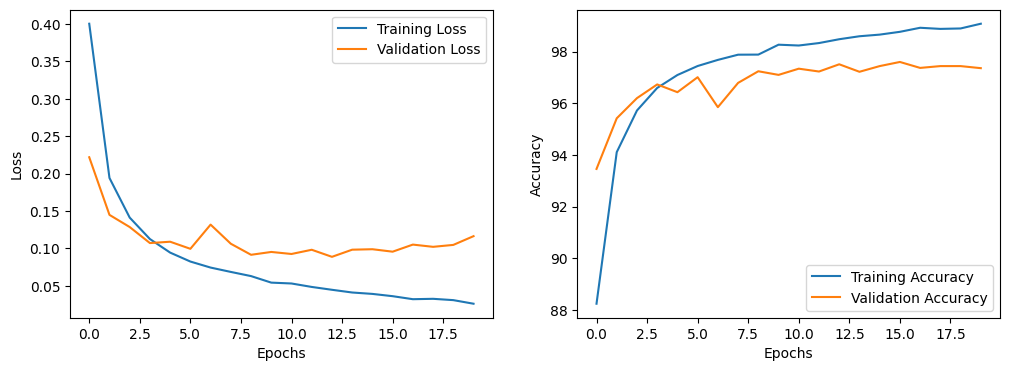



Final Training Accuracy:  99.08  %
Final Test Accuracy:  97.36  %


In [ ]:

# Create model, loss function, and optimizer

input_size = 784  # Images are of 28x28 so the input size equals to 28 x 28 = 784
hidden_size1 = 128
hidden_size2 = 64
output_size = 10  # The number of classes are 10 since 0 to 9.

model = FeedForwardNN(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_losses, valid_losses, train_acc, valid_acc = train_model(model, train_dl, valid_dl, criterion, optimizer, num_epochs=20)

# Plot the loss and accuracy curves
plot_curves(train_losses, valid_losses, train_acc, valid_acc)
print('\n')
print("Final Training Accuracy: ", train_acc[-1]," %")
print("Final Test Accuracy: ", valid_acc[-1]," %")


## Results and Techniques employed

When employing a feedforward network composed solely of fully connected layers for MNIST data, we attained a test accuracy exceeding 55%, achieved without employing any regularization techniques.

<h2> Part (b) </h2>

Create a convolutional neural network consisting of at least two convolutional layers. You are allowed to
experiment with regularization techniques and are expected to reach above 75% accuracy on test data.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
numb_batch = 64

In [ ]:
# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
valid_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
train_dl = DataLoader(dataset=train_data, batch_size=numb_batch, shuffle=True)
valid_dl = DataLoader(dataset=valid_data, batch_size=numb_batch, shuffle=False)


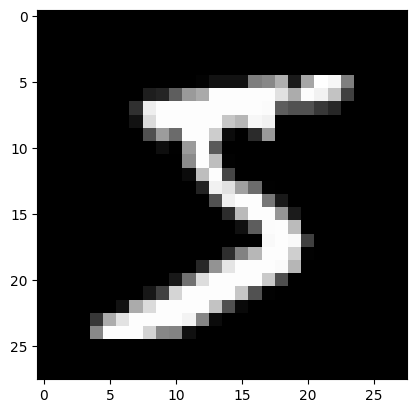

In [ ]:
plt.imshow(train_data[0][0][0],cmap = "gray")

In [ ]:
# Define the Convolutional Neural Network (CNN) architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# Function to train the model
def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20):
    train_losses = []
    valid_losses = []
    train_acc = []
    valid_acc = []
    size_train = len(train_loader)
    size_val = len(valid_loader)

    for epoch in range(num_epochs):
        model.train()
        loss_cont = 0.0
        c_pred_train = 0
        tot_train = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            loss_cont += loss.item()

            predicted_value, predicted_index = outputs.max(1)
            tot_train += labels.size(0)
            c_pred_train += predicted_index.eq(labels).sum().item()

        mean_loss_cont = loss_cont / size_train
        train_losses.append(mean_loss_cont)
        train_accuracy = (c_pred_train / tot_train) * 100
        train_acc.append(train_accuracy)

        # Validation
        model.eval()
        valid_loss = 0.0
        c_pred_valid = 0
        tot_valid = 0

        with torch.no_grad():
            for inputs, labels in valid_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()

                predicted_value, predicted_index = outputs.max(1)
                tot_valid += labels.size(0)
                c_pred_valid += predicted_index.eq(labels).sum().item()

        mean_valid_loss = valid_loss / size_val
        valid_losses.append(mean_valid_loss)
        valid_accuracy = (c_pred_valid / tot_valid) * 100
        valid_acc.append(valid_accuracy)

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Train Loss: {mean_loss_cont:.4f}, Train Acc: {train_accuracy:.4f}, '
              f'Valid Loss: {mean_valid_loss:.4f}, Valid Acc: {valid_accuracy:.4f}')

    return train_losses, valid_losses, train_acc, valid_acc


In [ ]:
# Function to plot the loss and accuracy curves
def plot_curves(train_losses, valid_losses, train_acc, valid_acc):
    plt.figure(figsize=(12, 4))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(valid_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


Epoch [1/20], Train Loss: 0.1614, Train Acc: 95.0900, Valid Loss: 0.0439, Valid Acc: 98.5100
Epoch [2/20], Train Loss: 0.0462, Train Acc: 98.5267, Valid Loss: 0.0436, Valid Acc: 98.5400
Epoch [3/20], Train Loss: 0.0298, Train Acc: 99.0533, Valid Loss: 0.0270, Valid Acc: 99.1200
Epoch [4/20], Train Loss: 0.0242, Train Acc: 99.2067, Valid Loss: 0.0275, Valid Acc: 99.1100
Epoch [5/20], Train Loss: 0.0172, Train Acc: 99.4250, Valid Loss: 0.0272, Valid Acc: 99.1400
Epoch [6/20], Train Loss: 0.0126, Train Acc: 99.6017, Valid Loss: 0.0305, Valid Acc: 99.0000
Epoch [7/20], Train Loss: 0.0119, Train Acc: 99.6250, Valid Loss: 0.0321, Valid Acc: 99.0800
Epoch [8/20], Train Loss: 0.0094, Train Acc: 99.6650, Valid Loss: 0.0276, Valid Acc: 99.1900
Epoch [9/20], Train Loss: 0.0071, Train Acc: 99.7850, Valid Loss: 0.0308, Valid Acc: 99.0600
Epoch [10/20], Train Loss: 0.0069, Train Acc: 99.7900, Valid Loss: 0.0333, Valid Acc: 99.1600
Epoch [11/20], Train Loss: 0.0073, Train Acc: 99.7483, Valid Loss: 0.

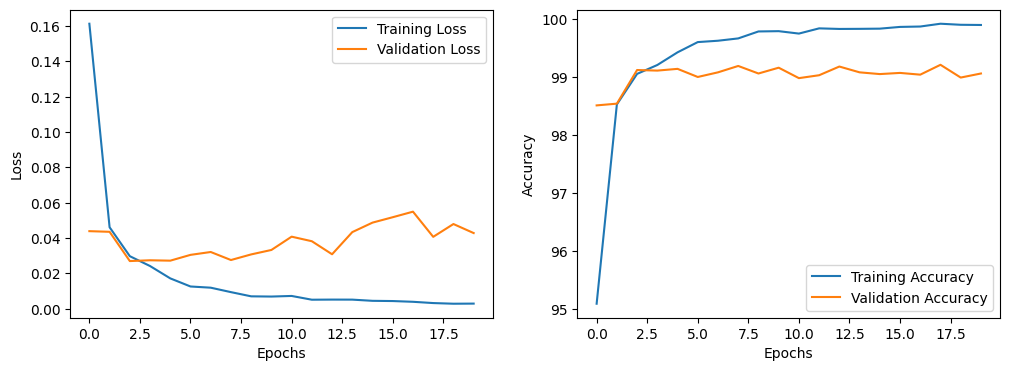

Final Training Accuracy:  99.89666666666666  %


Final Test Accuracy:  99.06  %


In [ ]:
# Create model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_losses, valid_losses, train_acc, valid_acc = train_model(model, train_dl, valid_dl, criterion, optimizer, num_epochs=20)

# Plot the loss and accuracy curves
plot_curves(train_losses, valid_losses, train_acc, valid_acc)

print('\n')
print("Final Training Accuracy: ", train_acc[-1],"%")
print("Final Test Accuracy: ", valid_acc[-1],"%")


## Results and Techniques Employed
Utilizing convolutional layers for MNIST data yielded a test accuracy surpassing 75%, achieved without employing any regularization techniques.

<h2> Part (c) </h2>
Use the pre-trained VGG-16 network (trained on ImageNet) as a feature extractor, and connect it to a feed
forward network consisting of fully connected layers. You should try to fine tune the network and are expected
to reach above 65% accuracy on test data

In [ ]:
import torch, torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import torchvision.models as models



In [ ]:
# Connect to a GPU if it is available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:

# Define transformations for the training and test data
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resizing to make both MNIST and ImageNet on same scale
    transforms.Grayscale(num_output_channels=3),  # Convert 1-channel grayscale to RGB 3-channel, all having same values.
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize using VGG-16's normalization values
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])



In [ ]:

# Load MNIST dataset with the defined transformations
train_set = torchvision.datasets.MNIST('./data/cifar10', train=True, download=True, transform=train_transform)
test_set = torchvision.datasets.MNIST('./data/cifar10', train=False, download=True, transform=test_transform)

# Define dataloaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=256, shuffle=False, num_workers=2)

In [ ]:
MNIST_CLASSES = ["0","1","2","3","4","5","6","7","8","9","0"]

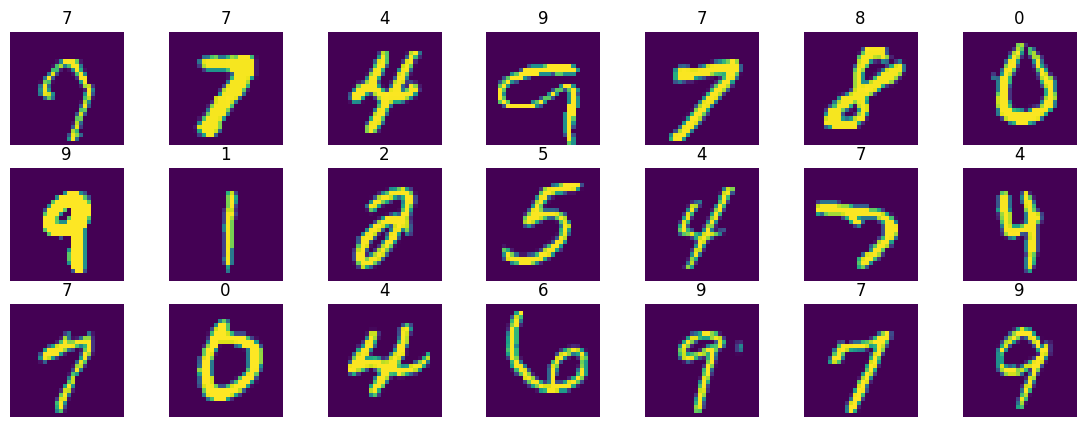

In [ ]:
# show 21 randomly selected samples from the training dataset

fig, axis = plt.subplots(nrows=3, ncols=7, figsize=(14, 5))

for ax, _ in zip(axis.ravel(), range(21)):
    inx = torch.randint(len(train_set), size=())
    ax.imshow(train_set.data[inx])
    ax.set_title(MNIST_CLASSES[train_set.targets[inx]], fontsize=12)
    ax.axis(False);

<h1> Defining the Network Architecture with VGG16 as feature extractor and feed forward fully connected layer as the classifier.

In [ ]:
# Function to train the model
def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20):
    train_losses = []
    valid_losses = []
    train_acc = []
    valid_acc = []
    size_train = len(train_loader)
    size_val = len(valid_loader)

    for epoch in range(num_epochs):
        model.train()
        loss_cont = 0.0
        c_pred_train = 0
        tot_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            loss_cont += loss.item()

            predicted_value, predicted_index = outputs.max(1)
            tot_train += labels.size(0)
            c_pred_train += predicted_index.eq(labels).sum().item()

        mean_loss_cont = loss_cont / size_train
        train_losses.append(mean_loss_cont)
        train_accuracy = (c_pred_train / tot_train) * 100
        train_acc.append(train_accuracy)

        # Validation
        model.eval()
        valid_loss = 0.0
        c_pred_valid = 0
        tot_valid = 0

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()

                predicted_value, predicted_index = outputs.max(1)
                tot_valid += labels.size(0)
                c_pred_valid += predicted_index.eq(labels).sum().item()

        mean_valid_loss = valid_loss / size_val
        valid_losses.append(mean_valid_loss)
        valid_accuracy = (c_pred_valid / tot_valid) * 100
        valid_acc.append(valid_accuracy)

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Train Loss: {mean_loss_cont:.4f}, Train Acc: {train_accuracy:.4f}, '
              f'Valid Loss: {mean_valid_loss:.4f}, Valid Acc: {valid_accuracy:.4f}')

    return train_losses, valid_losses, train_acc, valid_acc


In [ ]:
# Function to plot the loss and accuracy curves
def plot_curves(train_losses, valid_losses, train_acc, valid_acc):
    plt.figure(figsize=(12, 4))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(valid_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [ ]:
# Load pre-trained VGG-16 model
vgg_model = torchvision.models.vgg16(pretrained=True)

# Freeze the parameters of the pre-trained layers
for param in vgg_model.parameters():
    param.requires_grad = False

# Replace the last fully connected layer which acts a classifeir with a new classifier based on classes in MNIST
in_features = vgg_model.classifier[6].in_features
vgg_model.classifier[6] = nn.Linear(in_features, 10)  # Since CiFAR10 has 10 classes in the dataset.

vgg_model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Loss criterion/function for the model
criterion = nn.CrossEntropyLoss()

# Optimizer for the model
optimizer = optim.Adam(vgg_model.parameters(), lr=0.001)


train_losses, test_losses, train_acc, test_acc = train_model(vgg_model, train_loader, test_loader, criterion, optimizer, 5)
plot_curves(train_losses, test_losses, train_acc, test_acc)

print("The Final Training Accuracy is: ",train_acc[-1], "%")
print("The Final Testing Accuracy is: ",test_acc[-1], "%")

## Results and Techniques Employed
When utilizing the pre-trained VGG16 model, originally trained on ImageNet, and integrating it with a fully connected layer tailored to MNIST data, a transformation was necessary due to the distinct characteristics of the datasets. While ImageNet images are 3D in RGB format, MNIST data is 2D and grayscale. Thus, the MNIST data underwent a transformation to match the 3D format, with all values uniformly set to the original grayscale intensity.

Remarkably, even without employing any regularization techniques, the model achieved a testing accuracy exceeding the target of 65%.

<h1> Question 4 - For CIFAR10</h1>
 This part requires you to use only pytorch. In each of the following subparts (a, b, and c) you are required to
do the following:

i. Create a network architecture.

ii. Load the CIFAR10 dataset.

iii. Preprocess the dataset accordingly.

iv. Train your architecture on the dataset for a reasonable number of epochs (maximum is 100) using the testing
data as your validation data.

v. Report both your training accuracy as well as validation accuracy.

vi. Plot both the training loss as well as the validation loss on the same plot.

vii. Plot both the training accuracy as well as the validation accuracy on the same plot.

For each subpart you are encouraged to experiment both with the hyperparameters as well as different
architecture designs for your network.

In [ ]:
import torch, torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import torchvision.models as models
import copy

<h2> Part (a) </h2>

 Create a feed forward neural network consisting of only fully connected layers; the network should have at least
two hidden layers. You are allowed to experiment with regularization techniques and are expected to reach above
55% accuracy on test data.

In [ ]:
numb_batch = 100

In [ ]:
# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
valid_data = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Create data loaders
train_dl = DataLoader(dataset=train_data, batch_size=numb_batch, shuffle=True)
valid_dl = DataLoader(dataset=valid_data, batch_size=numb_batch, shuffle=False)


100%|██████████| 170498071/170498071 [00:02<00:00, 56920367.22it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


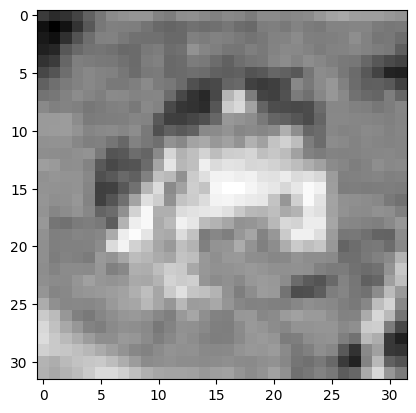

In [ ]:
plt.imshow(train_data[0][0][0],cmap = "gray")

In [ ]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, output_size, dropout_rate=0.5):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.batch_normal1 = nn.BatchNorm1d(hidden_size1)
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.batch_normal2 = nn.BatchNorm1d(hidden_size2)

        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.ReLU()
        self.batch_normal3 = nn.BatchNorm1d(hidden_size3)

        self.fc4 = nn.Linear(hidden_size3, hidden_size4)
        self.relu4 = nn.ReLU()
        self.batch_normal4 = nn.BatchNorm1d(hidden_size4)

        self.fc5 = nn.Linear(hidden_size4, output_size)
    def forward(self, x):
        x = self.relu1(self.batch_normal1(self.fc1(x)))
        x = self.dropout1(x)  # Applying dropout after activation
        x = self.relu2(self.batch_normal2(self.fc2(x)))
        x = self.relu3(self.batch_normal3(self.fc3(x)))
        x = self.relu4(self.batch_normal4(self.fc4(x)))
        x = self.fc5(x)
        return x



In [ ]:
# Function to train the model
def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20):
    train_losses = []
    valid_losses = []
    train_acc = []
    valid_acc = []
    size_train = len(train_loader)
    size_val = len(valid_loader)

    for epoch in range(num_epochs):
        model.train()
        loss_cont = 0.0
        c_pred_train = 0
        tot_train = 0

        for inputs, labels in train_loader:
            inputs = inputs.view(-1, 32*32*3)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            loss_cont += loss.item()

            predicted_value, predicted_index = outputs.max(1)
            tot_train += labels.size(0)
            c_pred_train += predicted_index.eq(labels).sum().item()

        mean_loss_cont = loss_cont / size_train
        train_losses.append(mean_loss_cont)
        train_accuracy = (c_pred_train / tot_train)*100
        train_acc.append(train_accuracy)

        # Validation
        model.eval()
        valid_loss = 0.0
        c_pred_valid = 0
        tot_valid = 0

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs = inputs.view(-1, 32*32*3)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()

                predicted_value, predicted_index = outputs.max(1)
                tot_valid += labels.size(0)
                c_pred_valid += predicted_index.eq(labels).sum().item()

        mean_valid_loss = valid_loss / size_val
        valid_losses.append(mean_valid_loss)
        valid_accuracy = (c_pred_valid / tot_valid)*100
        valid_acc.append(valid_accuracy)

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Train Loss: {mean_loss_cont:.4f}, Train Acc: {train_accuracy:.4f}, '
              f'Valid Loss: {mean_valid_loss:.4f}, Valid Acc: {valid_accuracy:.4f}')

    return train_losses, valid_losses, train_acc, valid_acc


In [ ]:
# Function to plot the loss and accuracy curves
def plot_curves(train_losses, valid_losses, train_acc, valid_acc):
    plt.figure(figsize=(12, 4))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(valid_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


Epoch [1/20], Train Loss: 1.8074, Train Acc: 35.1060, Valid Loss: 1.5752, Valid Acc: 44.3400
Epoch [2/20], Train Loss: 1.6167, Train Acc: 42.2340, Valid Loss: 1.4799, Valid Acc: 47.4100
Epoch [3/20], Train Loss: 1.5487, Train Acc: 44.6500, Valid Loss: 1.4282, Valid Acc: 49.3900
Epoch [4/20], Train Loss: 1.5024, Train Acc: 46.3440, Valid Loss: 1.4095, Valid Acc: 50.5500
Epoch [5/20], Train Loss: 1.4655, Train Acc: 47.6980, Valid Loss: 1.3790, Valid Acc: 50.9700
Epoch [6/20], Train Loss: 1.4358, Train Acc: 48.6860, Valid Loss: 1.3647, Valid Acc: 51.1200
Epoch [7/20], Train Loss: 1.4104, Train Acc: 49.3580, Valid Loss: 1.3299, Valid Acc: 52.4100
Epoch [8/20], Train Loss: 1.3878, Train Acc: 50.2400, Valid Loss: 1.3267, Valid Acc: 52.4300
Epoch [9/20], Train Loss: 1.3661, Train Acc: 51.2760, Valid Loss: 1.3051, Valid Acc: 53.4300
Epoch [10/20], Train Loss: 1.3540, Train Acc: 51.6560, Valid Loss: 1.2953, Valid Acc: 53.6000
Epoch [11/20], Train Loss: 1.3323, Train Acc: 52.3260, Valid Loss: 1.

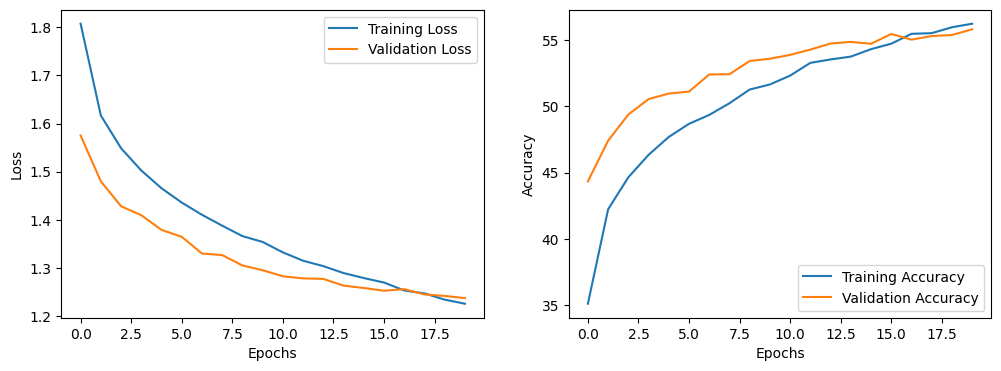

In [ ]:

# Create model, loss function, and optimizer

input_size = 32*32*3 # Images are of 28x28 so the input size equals to 28 x 28 = 784
hidden_size1 = 256
hidden_size2 = 128
hidden_size3 = 64
hidden_size4 = 32
output_size = 10  # The number of classes are 10 since 0 to 9.

model = FeedForwardNN(input_size, hidden_size1, hidden_size2,hidden_size3,hidden_size4, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_losses, valid_losses, train_acc, valid_acc = train_model(model, train_dl, valid_dl, criterion, optimizer, num_epochs=20)

# Plot the loss and accuracy curves
plot_curves(train_losses, valid_losses, train_acc, valid_acc)

print('\n')
print("Final Training Accuracy: ", train_acc[-1]," %")
print("Final Test Accuracy: ", valid_acc[-1]," %")


## Results and Techniques employed

When employing a feedforward network comprised solely of fully connected layers for the CIFAR10 dataset, initial attempts yielded a test accuracy of less than 55%, even without employing any regularization techniques. Subsequently, I explored various regularization methods, including L2 regularization, neuron dropout with dropout rates of 0.5 and 0.2 after each hidden layer individually, and Xavier Initialization for weight initialization. However, these methods did not improve the accuracy beyond 55%.

In a further iteration, I increased the number of hidden layers from 2 to 4, all fully connected, and implemented batch normalization after each hidden layer. Additionally, I applied neuron dropout with a dropout rate of 0.5 after the first hidden layer only. This adjustment resulted in a test accuracy surpassing the desired threshold of 55%.

<h2> Part (b) </h2>

Create a convolutional neural network consisting of at least two convolutional layers. You are allowed to
experiment with regularization techniques and are expected to reach above 75% accuracy on test data.


In [ ]:
numb_batch = 25

In [ ]:
# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


# Load MNIST dataset
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
valid_data = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Create data loaders
train_dl = DataLoader(dataset=train_data, batch_size=numb_batch, shuffle=True)
valid_dl = DataLoader(dataset=valid_data, batch_size=numb_batch, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


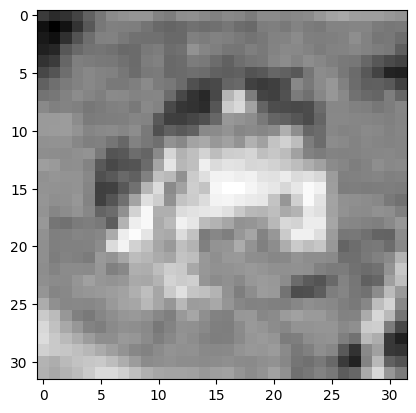

In [ ]:
plt.imshow(train_data[0][0][0],cmap = "gray")

In [ ]:

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  # Batch normalization after the first convolutional layer
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  # Batch normalization after the second convolutional layer
        self.conv3 = nn.Conv2d(32,64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)  # Batch normalization after the third convolutional layer
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)  # Batch normalization after the fourth convolutional layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 2 * 2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))  # Apply batch normalization after conv1
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))  # Apply batch normalization after conv2
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))  # Apply batch normalization after conv3
        x = self.pool(torch.relu(self.bn4(self.conv4(x))))  # Apply batch normalization after conv4
        x = self.flatten(x)  # Flatten the tensor using nn.Flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Function to train the model
def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20):
    train_losses = []
    valid_losses = []
    train_acc = []
    valid_acc = []
    size_train = len(train_loader)
    size_val = len(valid_loader)

    for epoch in range(num_epochs):
        model.train()
        loss_cont = 0.0
        c_pred_train = 0
        tot_train = 0

        for inputs, labels in train_loader:
            # inputs = inputs.view(-1, 3, 32, 32)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            loss_cont += loss.item()

            predicted_value, predicted_index = outputs.max(1)
            tot_train += labels.size(0)
            c_pred_train += predicted_index.eq(labels).sum().item()

        mean_loss_cont = loss_cont / size_train
        train_losses.append(mean_loss_cont)
        train_accuracy = (c_pred_train / tot_train)*100
        train_acc.append(train_accuracy)

        # Validation
        model.eval()
        valid_loss = 0.0
        c_pred_valid = 0
        tot_valid = 0

        with torch.no_grad():
            for inputs, labels in valid_loader:
                # inputs = inputs.view(-1, 3, 32, 32)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()

                predicted_value, predicted_index = outputs.max(1)
                tot_valid += labels.size(0)
                c_pred_valid += predicted_index.eq(labels).sum().item()

        mean_valid_loss = valid_loss / size_val
        valid_losses.append(mean_valid_loss)
        valid_accuracy = (c_pred_valid / tot_valid)*100
        valid_acc.append(valid_accuracy)

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Train Loss: {mean_loss_cont:.4f}, Train Acc: {train_accuracy:.4f}, '
              f'Valid Loss: {mean_valid_loss:.4f}, Valid Acc: {valid_accuracy:.4f}')

    return train_losses, valid_losses, train_acc, valid_acc


In [ ]:
# Function to plot the loss and accuracy curves
def plot_curves(train_losses, valid_losses, train_acc, valid_acc):
    plt.figure(figsize=(12, 4))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(valid_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


Epoch [1/20], Train Loss: 1.2362, Train Acc: 54.8780, Valid Loss: 0.9285, Valid Acc: 67.1200
Epoch [2/20], Train Loss: 0.8732, Train Acc: 69.2820, Valid Loss: 0.8417, Valid Acc: 70.2500
Epoch [3/20], Train Loss: 0.7312, Train Acc: 74.7300, Valid Loss: 0.7924, Valid Acc: 72.7200
Epoch [4/20], Train Loss: 0.6350, Train Acc: 77.8120, Valid Loss: 0.7061, Valid Acc: 76.0500
Epoch [5/20], Train Loss: 0.5671, Train Acc: 80.3760, Valid Loss: 0.7186, Valid Acc: 76.0000
Epoch [6/20], Train Loss: 0.5050, Train Acc: 82.4420, Valid Loss: 0.7142, Valid Acc: 76.7100
Epoch [7/20], Train Loss: 0.4496, Train Acc: 84.3840, Valid Loss: 0.7126, Valid Acc: 76.6600
Epoch [8/20], Train Loss: 0.4079, Train Acc: 85.8980, Valid Loss: 0.7640, Valid Acc: 76.6400
Epoch [9/20], Train Loss: 0.3652, Train Acc: 87.3200, Valid Loss: 0.7767, Valid Acc: 77.1900
Epoch [10/20], Train Loss: 0.3238, Train Acc: 88.5860, Valid Loss: 0.8069, Valid Acc: 76.0200
Epoch [11/20], Train Loss: 0.2945, Train Acc: 89.7520, Valid Loss: 0.

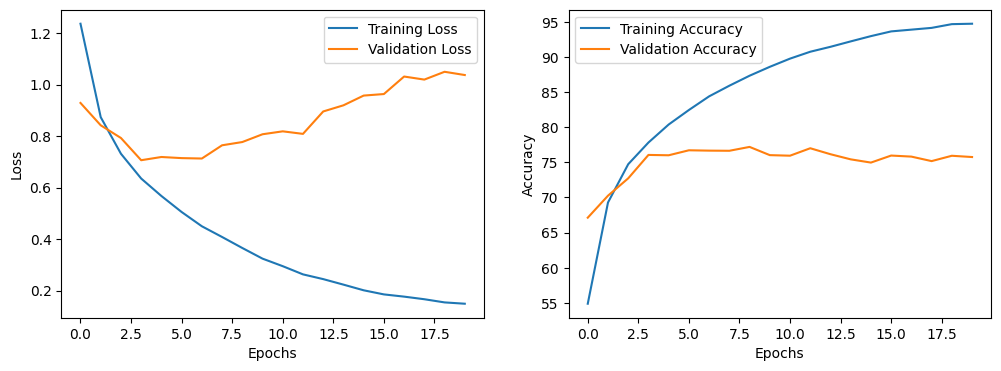

Final Training Accuracy:  94.718  %


Final Test Accuracy:  75.75  %


In [ ]:
# Create model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_losses, valid_losses, train_acc, valid_acc = train_model(model, train_dl, valid_dl, criterion, optimizer, num_epochs=20)

# Plot the loss and accuracy curves
plot_curves(train_losses, valid_losses, train_acc, valid_acc)

print('\n')
print("Final Training Accuracy: ", train_acc[-1],"%")
print("Final Test Accuracy: ", valid_acc[-1],"%")


## Results and Techniques Employed

Initially, when utilizing a CNN architecture with 2 convolutional layers followed by a single fully connected layer on the CIFAR10 dataset, the achieved test accuracy fell short of the desired 75%.

To address this, in the first iteration, I made several adjustments. I increased the number of convolutional layers from 2 to 4 and augmented the fully connected layers to 3. Additionally, I incorporated batch normalization after each convolutional layer.

Remarkably, these modifications resulted in surpassing the target test accuracy of 75% in the first iteration itself.

<h2> Part (c) </h2>
Use the pre-trained VGG-16 network (trained on ImageNet) as a feature extractor, and connect it to a feed
forward network consisting of fully connected layers. You should try to fine tune the network and are expected
to reach above 65% accuracy on test data

In [ ]:
import torch, torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import torchvision.models as models


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [ ]:
# Define transformations for the training and test data
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])



In [ ]:
# Load CIFAR-10 dataset with the defined transformations
train_set = torchvision.datasets.CIFAR10('./data/cifar10', train=True, download=True, transform=train_transform)
test_set = torchvision.datasets.CIFAR10('./data/cifar10', train=False, download=True, transform=test_transform)

# Define dataloaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=256, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Function to train the model
def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20):
    train_losses = []
    valid_losses = []
    train_acc = []
    valid_acc = []
    size_train = len(train_loader)
    size_val = len(valid_loader)

    for epoch in range(num_epochs):
        model.train()
        loss_cont = 0.0
        c_pred_train = 0
        tot_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            loss_cont += loss.item()

            predicted_value, predicted_index = outputs.max(1)
            tot_train += labels.size(0)
            c_pred_train += predicted_index.eq(labels).sum().item()

        mean_loss_cont = loss_cont / size_train
        train_losses.append(mean_loss_cont)
        train_accuracy = (c_pred_train / tot_train) * 100
        train_acc.append(train_accuracy)

        # Validation
        model.eval()
        valid_loss = 0.0
        c_pred_valid = 0
        tot_valid = 0

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()

                predicted_value, predicted_index = outputs.max(1)
                tot_valid += labels.size(0)
                c_pred_valid += predicted_index.eq(labels).sum().item()

        mean_valid_loss = valid_loss / size_val
        valid_losses.append(mean_valid_loss)
        valid_accuracy = (c_pred_valid / tot_valid) * 100
        valid_acc.append(valid_accuracy)

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Train Loss: {mean_loss_cont:.4f}, Train Acc: {train_accuracy:.4f}, '
              f'Valid Loss: {mean_valid_loss:.4f}, Valid Acc: {valid_accuracy:.4f}')

    return train_losses, valid_losses, train_acc, valid_acc


In [ ]:
# Function to plot the loss and accuracy curves
def plot_curves(train_losses, valid_losses, train_acc, valid_acc):
    plt.figure(figsize=(12, 4))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(valid_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

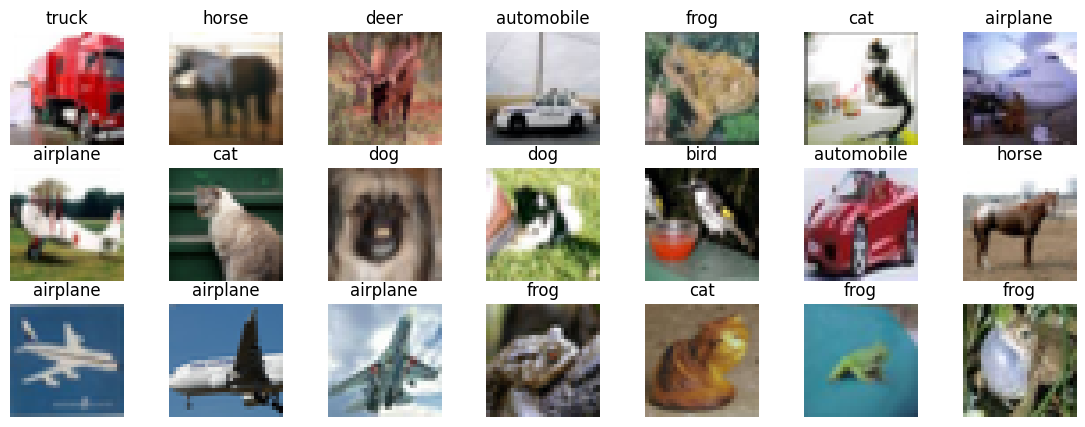

In [ ]:
# show 21 randomly selected samples from the training dataset

fig, axis = plt.subplots(nrows=3, ncols=7, figsize=(14, 5))

for ax, _ in zip(axis.ravel(), range(21)):
    inx = torch.randint(len(train_set), size=())
    ax.imshow(train_set.data[inx])
    ax.set_title(classes[train_set.targets[inx]], fontsize=12)
    ax.axis(False);

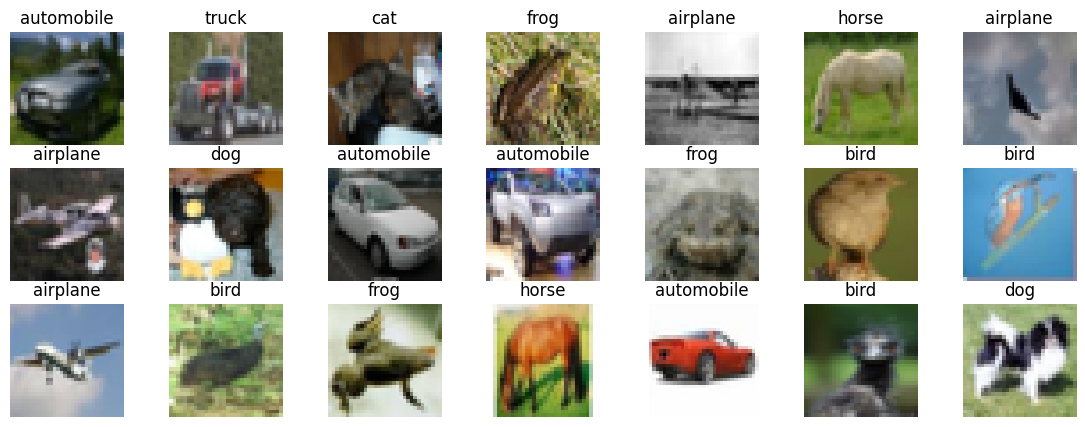

In [ ]:
# show 21 randomly selected samples from the test dataset

fig, axis = plt.subplots(nrows=3, ncols=7, figsize=(14, 5))

for ax, _ in zip(axis.ravel(), range(21)):
    inx = torch.randint(len(test_set), size=())
    ax.imshow(test_set.data[inx])
    ax.set_title(classes[test_set.targets[inx]], fontsize=12)
    ax.axis(False);

In [ ]:

# Load pre-trained VGG-16 model
model = torchvision.models.vgg16(pretrained=True)

# Freeze the parameters of the pre-trained layers
for param in model.parameters():
    param.requires_grad = False

# Replacing the last fully connected layer (classifier) with a Classifier based on CIFAR10 classes.
in_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(in_features, 10)  # 10 output classes for CIFAR-10

# Change model to available device
model.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)


train_losses, test_losses, train_acc, test_acc = train_model(model, train_loader, test_loader, criterion, optimizer, 5)
plot_curves(train_losses, test_losses, train_acc, test_acc)

print("The Final Training Accuracy is: ",train_acc[-1], " %")
print("The Final Testing Accuracy is: ",test_acc[-1], " %")

Epoch [1/5], Train Loss: 1.1359, Train Acc: 59.2160, Valid Loss: 0.5864, Valid Acc: 79.1200
Epoch [2/5], Train Loss: 1.0688, Train Acc: 61.9600, Valid Loss: 0.5432, Valid Acc: 80.6300
Epoch [3/5], Train Loss: 1.0581, Train Acc: 62.3700, Valid Loss: 0.5235, Valid Acc: 81.5500
Epoch [4/5], Train Loss: 1.0589, Train Acc: 62.4340, Valid Loss: 0.5266, Valid Acc: 81.4900


## Results and Techniques employed

When leveraging a VGG16 model pretrained on the ImageNet dataset and integrating it with a fully connected layer tailored to the CIFAR10 dataset, we applied various data augmentation techniques to enhance the model's performance.

For training data, we employed transformations including random resized cropping to 224x224 dimensions, random horizontal flipping, and normalization using specific mean and standard deviation values for each channel.

Similarly, for testing data, we applied resizing to 224x224 dimensions, and normalization using the same mean and standard deviation values as the training data.

Remarkably, even without employing any regularization techniques and just with data augmentation, our model surpassed the targeted testing accuracy threshold of 65%.